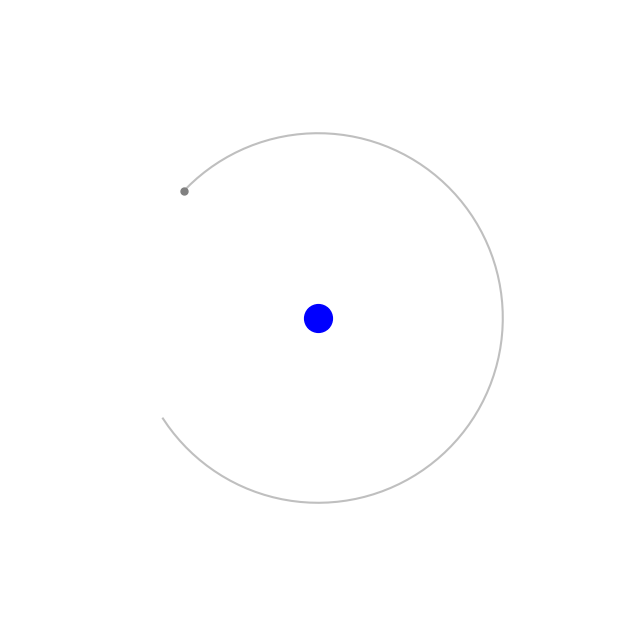

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Initialize figure
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_aspect('equal')
ax.axis('off')

# Ball rolling down an inclined plane
plane_line, = ax.plot([], [], lw=2, color='brown')
ball, = ax.plot([], [], 'o', color='blue', markersize=10)

# Celestial mechanics (planets and gravity simulation)
planet1, = ax.plot([], [], 'o', color='orange', markersize=12, label="Planet")
planet2, = ax.plot([], [], 'o', color='green', markersize=8, label="Moon")
trail1, = ax.plot([], [], '-', color='orange', alpha=0.5)
trail2, = ax.plot([], [], '-', color='green', alpha=0.5)

# Satellite orbiting Earth
earth, = ax.plot([], [], 'o', color='blue', markersize=20, label="Earth")
satellite, = ax.plot([], [], 'o', color='gray', markersize=5, label="Satellite")
satellite_trail, = ax.plot([], [], '-', color='gray', alpha=0.5)

# Data for trails
trail1_data = []
trail2_data = []
satellite_trail_data = []

# Scene transitions
total_frames = 300

def update(frame):
    global trail1_data, trail2_data, satellite_trail_data
    ax.clear()
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)
    ax.axis('off')

    if frame < 100:
        # Scene 1: Ball rolling down inclined plane
        incline_angle = np.radians(30)  # 30-degree incline
        length = 8
        plane_x = np.array([-length / 2, length / 2])
        plane_y = np.array([length / 2 * np.tan(-incline_angle), length / 2 * np.tan(incline_angle)])
        ax.plot(plane_x, plane_y, lw=2, color='brown')

        # Ball rolling
        ball_x = -length / 2 + frame / 100 * length
        ball_y = np.tan(-incline_angle) * ball_x + length / 2 * np.tan(-incline_angle)
        ax.plot(ball_x, ball_y, 'o', color='blue', markersize=10)

    elif 100 <= frame < 200:
        # Scene 2: Transition to celestial mechanics
        ax.plot([], [], '-', color='black')  # Clear ball and plane
        planet1_x = np.cos(frame * 0.02) * 5
        planet1_y = np.sin(frame * 0.02) * 5
        planet2_x = np.cos(frame * 0.04) * 2 + planet1_x
        planet2_y = np.sin(frame * 0.04) * 2 + planet1_y

        trail1_data.append([planet1_x, planet1_y])
        trail2_data.append([planet2_x, planet2_y])

        ax.plot(planet1_x, planet1_y, 'o', color='orange', markersize=12)
        ax.plot(planet2_x, planet2_y, 'o', color='green', markersize=8)
        if len(trail1_data) > 2:
            ax.plot(*zip(*trail1_data), '-', color='orange', alpha=0.5)
        if len(trail2_data) > 2:
            ax.plot(*zip(*trail2_data), '-', color='green', alpha=0.5)

    else:
        # Scene 3: Satellites orbiting Earth
        ax.plot([], [], '-', color='black')  # Clear celestial trails
        earth_x, earth_y = 0, 0
        satellite_x = 6 * np.cos(frame * 0.05)
        satellite_y = 6 * np.sin(frame * 0.05)

        satellite_trail_data.append([satellite_x, satellite_y])

        ax.plot(earth_x, earth_y, 'o', color='blue', markersize=20)
        ax.plot(satellite_x, satellite_y, 'o', color='gray', markersize=5)
        if len(satellite_trail_data) > 2:
            ax.plot(*zip(*satellite_trail_data), '-', color='gray', alpha=0.5)

ani = animation.FuncAnimation(fig, update, frames=total_frames, interval=50)

# Save as video
ani.save("rolling_to_orbits.mp4", writer='ffmpeg', fps=30)

# Show the animation
plt.show()
